In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:
import zipfile
import os

zip_path = "archive (1).zip"  # use exact file name
extract_dir = "sales_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
import pandas as pd

csv_path = os.path.join(extract_dir, "mock_kaggle.csv")
df = pd.read_csv(csv_path)

In [ ]:
# Rename columns
df.rename(columns={
    'data': 'date',
    'venda': 'sales',
    'estoque': 'stock',
    'preco': 'price'
}, inplace=True)

# Convert date
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values('date')

# Check for nulls and dtypes
print(df.isnull().sum())
print(df.dtypes)

date     0
sales    0
stock    0
price    0
dtype: int64
date     datetime64[ns]
sales             int64
stock             int64
price           float64
dtype: object


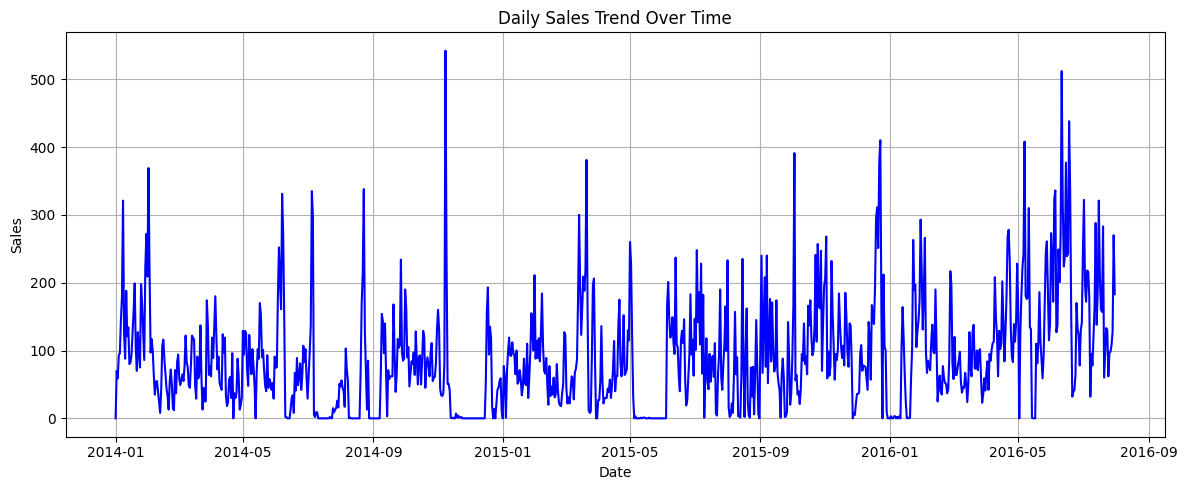

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['sales'], color='blue')
plt.title("Daily Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

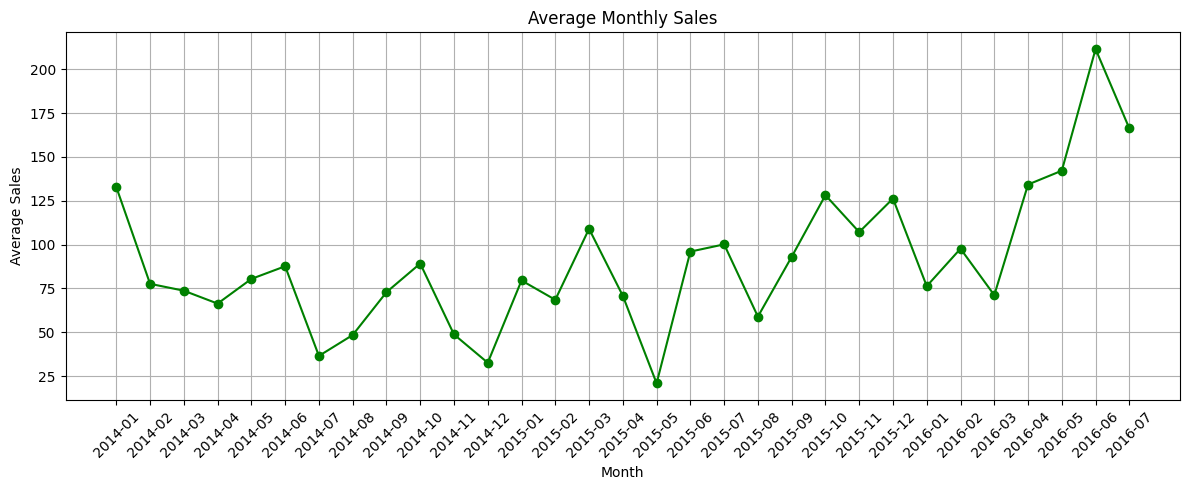

In [ ]:
df['month'] = df['date'].dt.to_period('M')

monthly_avg = df.groupby('month')['sales'].mean().reset_index()
monthly_avg['month'] = monthly_avg['month'].astype(str)

plt.figure(figsize=(12, 5))
plt.plot(monthly_avg['month'], monthly_avg['sales'], marker='o', linestyle='-', color='green')
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

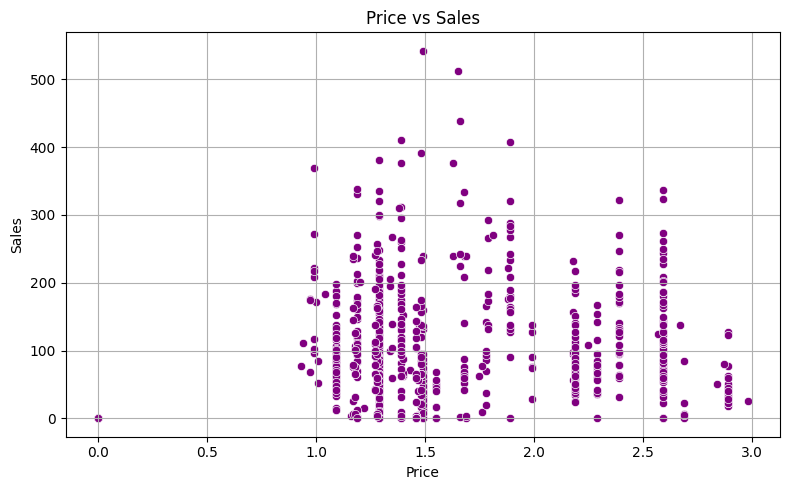

Correlation between price and sales: 0.09


In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='sales', data=df, color='purple')
plt.title("Price vs Sales")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Check correlation
correlation = df['price'].corr(df['sales'])
print(f"Correlation between price and sales: {correlation:.2f}")

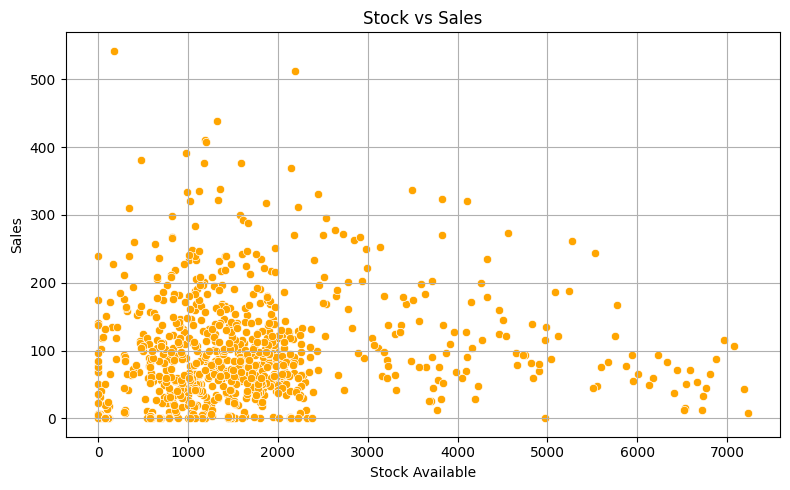

Correlation between stock and sales: 0.15


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='stock', y='sales', data=df, color='orange')
plt.title("Stock vs Sales")
plt.xlabel("Stock Available")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional correlation
print(f"Correlation between stock and sales: {df['stock'].corr(df['sales']):.2f}")

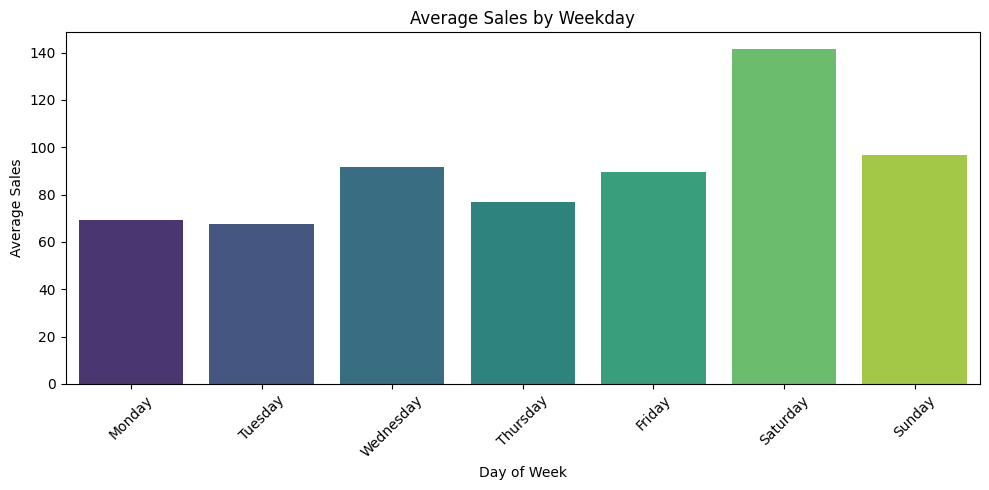

In [ ]:
df['weekday'] = df['date'].dt.day_name()

weekday_avg = df.groupby('weekday')['sales'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=weekday_avg.index,
    y=weekday_avg.values,
    hue=weekday_avg.index,  # Assign hue to address the warning
    legend=False,  # Disable legend as hue is used for coloring
    palette='viridis'
)
plt.title("Average Sales by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

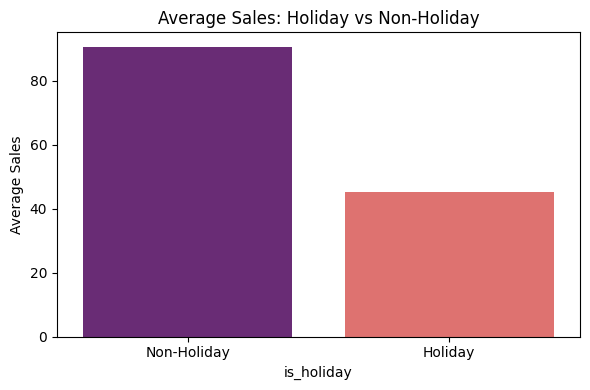

In [ ]:
# Define some example holidays
holiday_dates = ['2014-01-01', '2014-12-25', '2014-07-04']  # Add more if needed

# Create 'is_holiday' column
df['is_holiday'] = df['date'].astype(str).isin(holiday_dates).astype(int)

# Compare average sales: holidays vs non-holidays
holiday_sales = df.groupby('is_holiday')['sales'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, hue=holiday_sales.index, legend=False, palette='magma')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title("Average Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

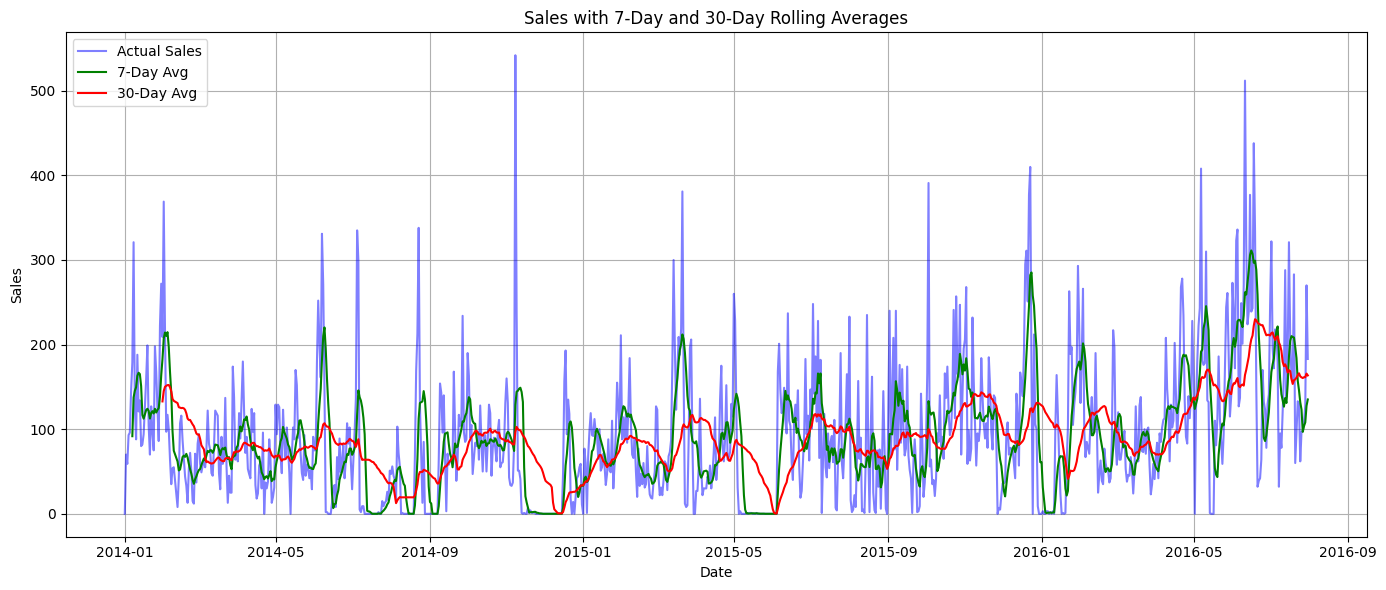

In [ ]:
# Create rolling averages
df['rolling_avg_7'] = df['sales'].rolling(window=7).mean()
df['rolling_avg_30'] = df['sales'].rolling(window=30).mean()

# Plot actual sales with rolling averages
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['sales'], label='Actual Sales', color='blue', alpha=0.5)
plt.plot(df['date'], df['rolling_avg_7'], label='7-Day Avg', color='green')
plt.plot(df['date'], df['rolling_avg_30'], label='30-Day Avg', color='red')
plt.title("Sales with 7-Day and 30-Day Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [ ]:
df['rolling_avg_7'] = df['sales'].rolling(window=7).mean()
df['rolling_avg_30'] = df['sales'].rolling(window=30).mean()

df['rolling_std_7'] = df['sales'].rolling(window=7).std()
df['rolling_std_30'] = df['sales'].rolling(window=30).std()

In [ ]:
df['lag_1'] = df['sales'].shift(1)
df['lag_7'] = df['sales'].shift(7)
df['lag_30'] = df['sales'].shift(30)

In [ ]:
df.dropna(inplace=True)
features = ['stock', 'price', 'day', 'month', 'year', 'weekday', 'is_weekend',
            'rolling_avg_7', 'rolling_avg_30', 'rolling_std_7', 'rolling_std_30',
            'lag_1', 'lag_7', 'lag_30', 'is_holiday']

target = 'sales'

In [ ]:
X = df[features]
y = df['sales']
# Use last 2 months for testing
train_df = df[df['date'] < '2014-11-01']
test_df = df[df['date'] >= '2014-11-01']

X_train = train_df[features]
y_train = train_df['sales']

X_test = test_df[features]
y_test = test_df['sales']

In [ ]:
!pip install xgboost
import xgboost as xgb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 3.4 MB/s eta 0:00:00


In [ ]:
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 45.83
RMSE: 65.03
R² Score: 0.42


In [ ]:
results_df = test_df[['date']].copy()
results_df['actual_sales'] = y_test.values
results_df['predicted_sales'] = y_pred

results_df.to_csv("xgboost_sales_predictions.csv", index=False)